### Основы визуализации данных с помощью Matplotlib

* [1 - Гистограмма (hist)](#1)
* [2 - Столбчатая диаграмма (barchart)](#2)
* [3 - Линейный график (plot)](#3)
* [4 - Точечная диаграмма (scatter plot)](#4)
* [5 - Круговая диаграмма (piechart)](#5)
* [6 - Столбчатая диаграмма (barchart)](#6)
* [7 - Гистограмма (hist)](#7)
* [8 - Линейный график (plot)](#8)
* [9 - Столбчатая диаграмма (barchart)](#9)
* [10 - Круговая диаграмма (piechart)](#10)

### Продвинутая визуализация с Matplotlib

* [11 - Линейный график (plot)](#11)
* [12 - Линейные графики в одних координатных осях](#12)
* [13 - Линейные графики в цикле (на разных координатных осях)](#13)
* [14 - Линейные графики на одном полотне](#14)
* [15 - Гистограммы в одних координатных осях](#15)
* [16 - Столбчатая диаграмма с раскрашенными столбцами](#16)
* [17 - Линейный график с подсвеченным промежутком времени (зеленый прямоугольник)](#17)
* [18 - Точечные графики на одном полотне](#18)

### Описание данных

Датасет `vgsales.csv` содержит информацию о суммарных продажах видеоигр для игровых консолей. 

#### Описание признаков:

* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<a id='1'></a>

### 1 - Гистограмма (hist)

Постройте гистограмму распределения объема продаж всех игр в Японии

In [60]:
serie = df.set_index('Name')['JP_Sales']
serie.head()

Name
Wii Sports                   3.77
Super Mario Bros.            6.81
Mario Kart Wii               3.79
Wii Sports Resort            3.28
Pokemon Red/Pokemon Blue    10.22
Name: JP_Sales, dtype: float64

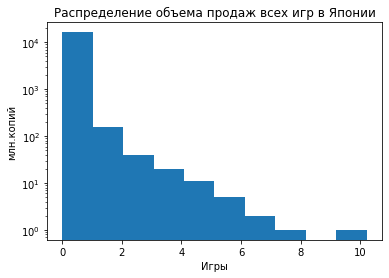

In [61]:
plt.hist(serie, log=True)

plt.title("Распределение объема продаж всех игр в Японии")   
plt.xlabel('Игры')                                         
plt.ylabel('млн.копий')  
plt.show()

# Добавим параметр log=True, чтобы сделать график более читаемым
# при переходе к логарифмам разброс значений в списке снижается, но "природа" данных (порядок значений) не меняется

In [62]:
serie.max()

10.22

In [63]:
serie.min()

0.0

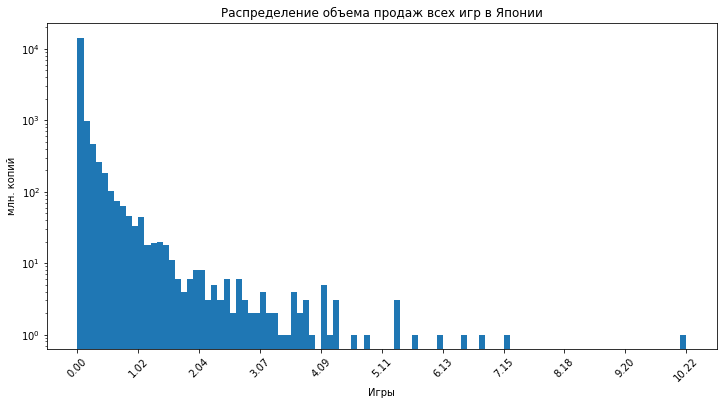

In [64]:
bin_width = serie.max() / 10

x_range = [i*bin_width for i in range(11)]
plt.figure(figsize=(12, 6))   # если надо рассмотреть поподробней
plt.hist(serie, log=True, bins=100)
plt.title("Распределение объема продаж всех игр в Японии")   
plt.xlabel('Игры')                                         
plt.ylabel('млн. копий')  
plt.xticks(x_range, rotation=45)
plt.show()

<a id='2'></a>

### 2 - Столбчатая диаграмма (barchart)

Постройте столбчатую диаграмму (barchart), показывающую сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах

In [65]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [66]:
df1 = df[df['Name'] == 'Grand Theft Auto V'][['Platform', 'Global_Sales']]
df1

,Platform,Global_Sales
16,PS3,21.40
23,X360,16.38
44,PS4,11.98
197,XOne,5.08
1896,PC,1.08


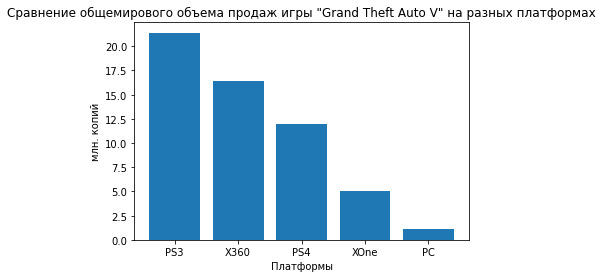

In [67]:
plt.bar(df1['Platform'], df1['Global_Sales'])
plt.title('Сравнение общемирового объема продаж игры "Grand Theft Auto V" на разных платформах')
plt.ylabel('млн. копий')
plt.xlabel('Платформы')
plt.show()

<a id='3'></a>

### 3 - Линейный график (plot)

Постройте линейный график динамики суммарных общемировых продаж всех игр по годам

In [68]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [69]:
series = df.groupby('Year')['Global_Sales'].agg('sum')
series.head()

Year
1980.0    11.38
1981.0    35.77
1982.0    28.86
1983.0    16.79
1984.0    50.36
Name: Global_Sales, dtype: float64

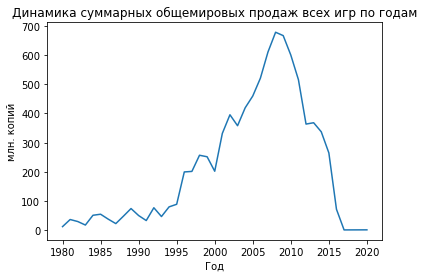

In [70]:
plt.plot(series)

plt.title("Динамика суммарных общемировых продаж всех игр по годам")
plt.xlabel('Год')
plt.ylabel('млн. копий')
plt.show()

<a id='4'></a>

### 4 - Точечная диаграмма (scatter plot)

Постройте точечную диаграмму, показывающую существование зависимости продаж во всем мире от продаж в Северной Америке

In [71]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


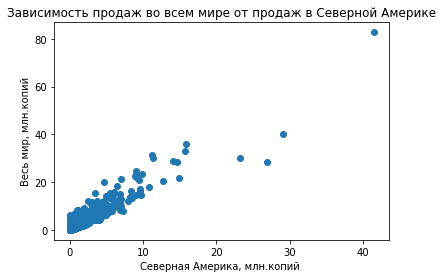

In [72]:
plt.scatter(df['NA_Sales'], df['Global_Sales'])

plt.title('Зависимость продаж во всем мире от продаж в Северной Америке')
plt.xlabel('Северная Америка, млн.копий ')
plt.ylabel('Весь мир, млн.копий')
plt.show()

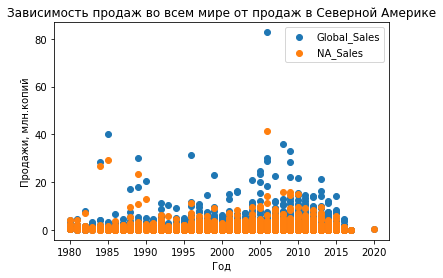

In [73]:
# Не очень видна зависимость, поэтому сделаем 2-й вариант:

plt.scatter(df['Year'], df['Global_Sales'], label='Global_Sales')
plt.scatter(df['Year'], df['NA_Sales'], label='NA_Sales')

plt.title('Зависимость продаж во всем мире от продаж в Северной Америке')
plt.xlabel('Год')
plt.ylabel('Продажи, млн.копий')
plt.legend()
plt.show()

<a id='5'></a>

### 5 - Круговая диаграмма (pie chart)

Постройте круговую диаграмму процентного соотношения продаж игры "Super Mario Bros." на разных платформах во всем мире. Подпишите доли графика с точностью 1 знак после запятой.

In [74]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [75]:
serie2 = df[df['Name'] == 'Super Mario Bros.'][['Platform', 'Global_Sales']]
serie2

,Platform,Global_Sales
1,NES,40.24
200,GB,5.07


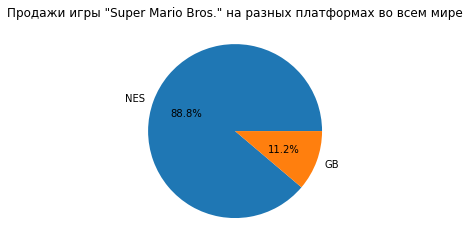

In [76]:
plt.pie(serie2['Global_Sales'], labels=serie2['Platform'], autopct='%1.1f%%')

plt.title('Продажи игры "Super Mario Bros." на разных платформах во всем мире')
plt.show()

<a id='6'></a>

### 6 - Столбчатая диаграмма (barchart)

Определите 5 издателей, имеющих наибольшие суммарные продажи во всем мире в 2013 году и проиллюстрируйте величину их продаж на столбчатой гистограмме

In [77]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [78]:
df2 = df[df['Year'] == 2013].groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)
df2

Publisher
Electronic Arts         52.92
Nintendo                52.79
Take-Two Interactive    52.41
Activision              43.49
Ubisoft                 27.39
Name: Global_Sales, dtype: float64

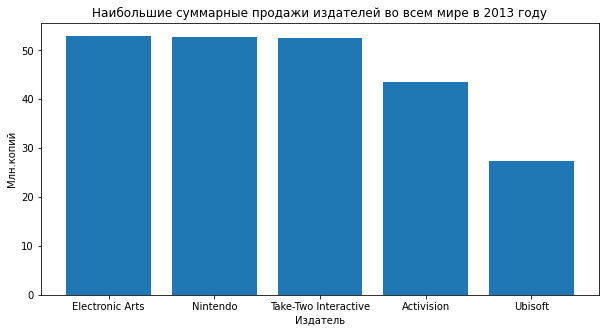

In [79]:
plt.figure(figsize=(10, 5))

plt.bar(df2.index, df2)

plt.title('Наибольшие суммарные продажи издателей во всем мире в 2013 году')
plt.xlabel('Издатель')
plt.ylabel('Млн.копий')
plt.show()

<a id='7'></a>

### 7 - Гистограмма (hist)

Постройте гистограмму распределения величины общемировых продаж игр, выпущенных не издателем Nintendo, в период с 2000 по 2015 год включительно. Гистограмма для большей точности должна содержать 20 столбцов, отсечки на оси X должны соответствовать границам столбцов.

In [80]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [81]:
serie = df[(df['Publisher'] != 'Nintendo') & (df['Year'] >= 2000) & (df['Year'] <= 2015)]['Global_Sales']
serie.head()

15    21.82
16    21.40
17    20.81
23    16.38
24    16.15
Name: Global_Sales, dtype: float64

In [82]:
bin_width = serie.max() / 20

x_range = [i*bin_width for i in range(21)]

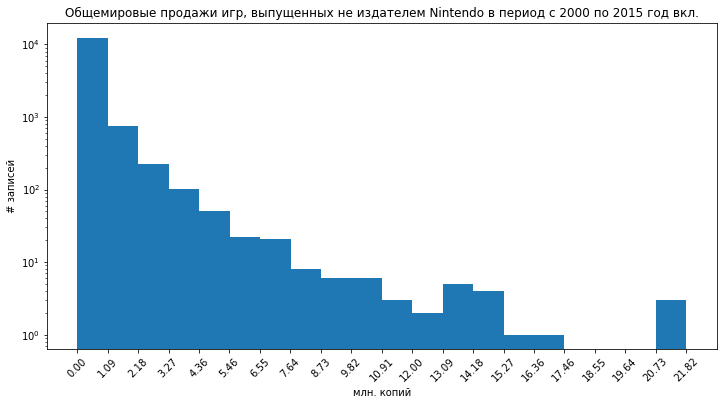

In [83]:
plt.figure(figsize=(12, 6))
plt.hist(serie, log=True, bins=20)
plt.title('Общемировые продажи игр, выпущенных не издателем Nintendo в период с 2000 по 2015 год вкл.')   
plt.xlabel('млн. копий')                                         
plt.ylabel('# записей')  
plt.xticks(x_range, rotation=45)

plt.show()

<a id='8'></a>

### 8 - Линейный график (plot)

Постройте линейный график динамики суммарных мировых продаж игр жанра "Action" по годам

In [84]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [85]:
series3 = df[df['Genre'] == 'Action'].groupby('Year')['Global_Sales'].agg('sum')
series3.head()

Year
1980.0     0.34
1981.0    14.84
1982.0     6.52
1983.0     2.86
1984.0     1.85
Name: Global_Sales, dtype: float64

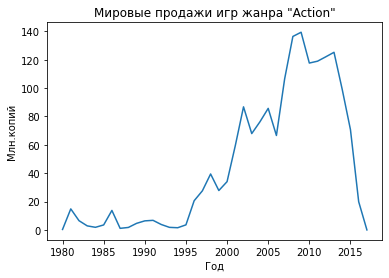

In [86]:
plt.plot(series3)
plt.title('Мировые продажи игр жанра "Action"')
plt.xlabel('Год')
plt.ylabel('Млн.копий')
plt.show()

<a id='9'></a>

### 9 - Столбчатая диаграмма (barchart)

С помощью столбчатой диаграммы проиллюстрируйте объем продаж всех игр издателя "Microsoft Game Studios" в Северной Америке за все время в зависимости от жанра. Столбцы расположите по убыванию.

In [87]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [88]:
df3 = df[df['Publisher'] == 'Microsoft Game Studios'].groupby('Genre')['NA_Sales'].sum().sort_values(ascending=False).reset_index()
df3


,Genre,NA_Sales
0,Shooter,64.65
1,Misc,30.61
2,Racing,16.83
3,Role-Playing,12.79
4,Sports,9.69
5,Action,8.09
6,Simulation,7.10
7,Strategy,1.81
8,Fighting,1.68
9,Adventure,1.09


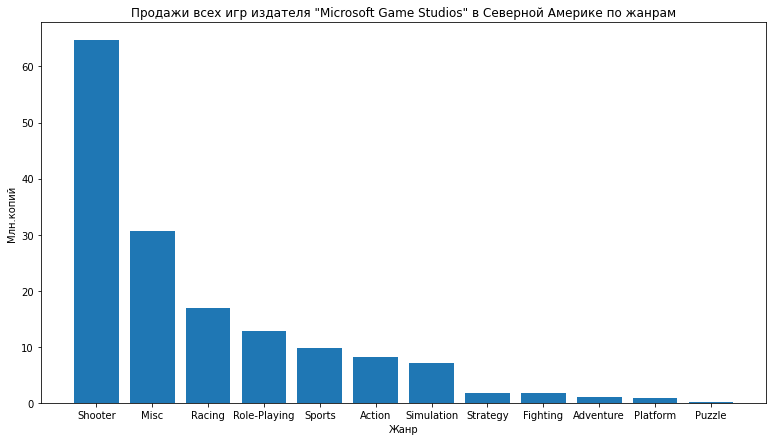

In [89]:
plt.figure(figsize=(13, 7))

plt.bar(df3['Genre'], df3['NA_Sales'])

plt.title('Продажи всех игр издателя "Microsoft Game Studios" в Северной Америке по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Млн.копий')
plt.show()

<a id='10'></a>

### 10 - Круговая диаграмма (piechart)

Одной из основных задач при анализе данных является проверка данных на корректность и отсутствие ошибок. В датасете "vgsales" одним из потенциальных источников ошибок является столбец с общемировыми продажами. По идее, значение общемировых продаж какой-либо игры должно равняться сумме продаж в Северной Америке, Европе, Японии и остальных странах, в противном случае мы получим ошибку в данных, которая может негативно повлиять на весь дальнейший процесс анализа.

Причин возникновения такой ошибки может быть несколько. Давайте рассмотрим следующие причины:
1. Ошибка округления. В целом, такая ошибка достаточно часто встречается при переводе величин из одних единиц в другие (например, из тысяч копий в миллионы копий).
1. Ошибка вычислений. Такая ситуация требует более серьезного исследования, поскольку она может привести к недостоверным результатам анализа данных.

Будем считать, что в записи имеется ошибка суммирования, если сумма продаж какой-либо игры в Северной Америке, Европе, Японии и остальных странах отличается от общемировых продаж более, чем на 0.01 млн копий.

С помощью круговой диаграммы проиллюстрируйте процент записей в датасете, имеющих такую ошибку суммирования продаж.

In [90]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [91]:
df4 = df['Mistakes'] = (abs(df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales'] - df['Global_Sales']) > 0.01)
df4
# abs убирает минус

0        False
1        False
2         True
3        False
4         True
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

In [92]:
have_mistakes = df4[df4 == False].count() / df4.count() * 100
have_mistakes
have_no_mistakes = df4[df4 == True].count() / df4.count() * 100
have_no_mistakes

15.815158452825642

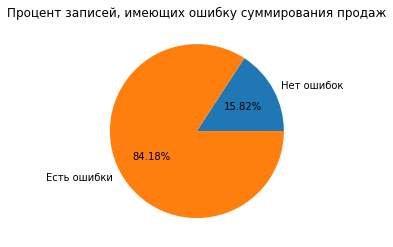

In [93]:
s = np.where(df4 == True, 'Нет ошибок', 'Есть ошибки')

plt.pie([have_no_mistakes, have_mistakes], labels=['Нет ошибок', 'Есть ошибки'], autopct='%1.2f%%')

plt.title('Процент записей, имеющих ошибку суммирования продаж')
plt.show()

<a id='11'></a>

## Продвинутая визуализация с Matplotlib

### 11 - Линейный график (plot)

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

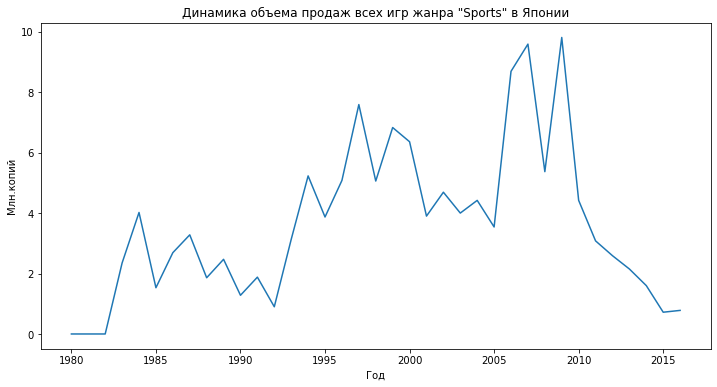

In [96]:
fig, ax = plt.subplots(figsize=(12,6))

df1 = df[df['Genre'] == 'Sports'].groupby('Year', as_index=False).agg('sum')

ax.plot(df1['Year'], df1['JP_Sales']) 

plt.title('Динамика объема продаж всех игр жанра "Sports" в Японии')
plt.xlabel('Год')
plt.ylabel('Млн.копий')

plt.show()

# 1-й вариант - можно не сбрасывать индексы, а в самом groupby указать в параметрах as_index=False - 
# чтобы столбец, по которому группируется, не был индексом

<a id='12'></a>

### 12 - Линейные графики в одних координатных осях

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

In [97]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


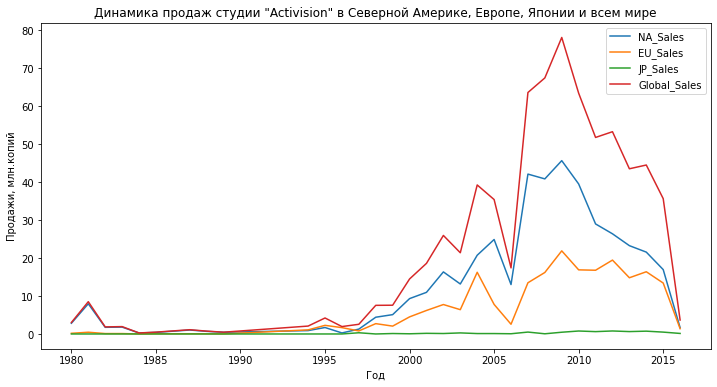

In [98]:
df1 = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df1.index, df1['NA_Sales'], label='NA_Sales')
ax.plot(df1.index, df1['EU_Sales'], label='EU_Sales')
ax.plot(df1.index, df1['JP_Sales'], label='JP_Sales')
ax.plot(df1.index, df1['Global_Sales'], label='Global_Sales')

ax.set_title('Динамика продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн.копий')
ax.legend()

plt.show()

# 2-й вариант - можно и так - в ax.plot вместо df1['Year'] писать df1.index

<a id='13'></a>

### 13 - Линейные графики в цикле (на разных координатных осях)

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

In [99]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


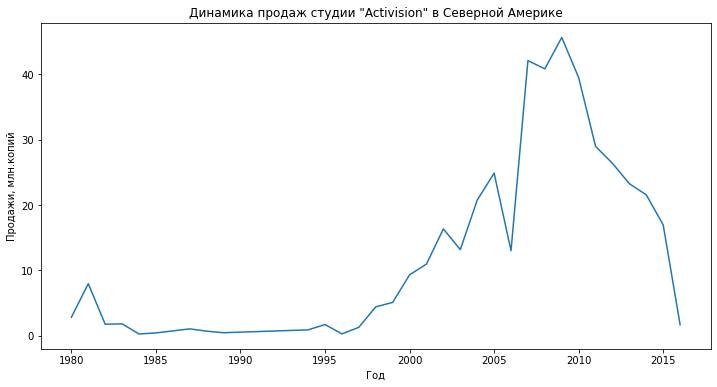

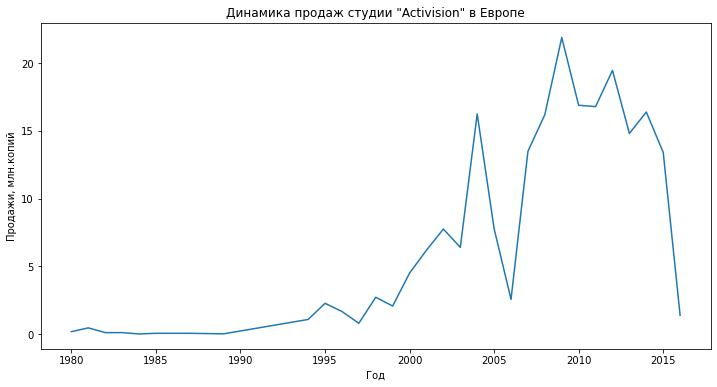

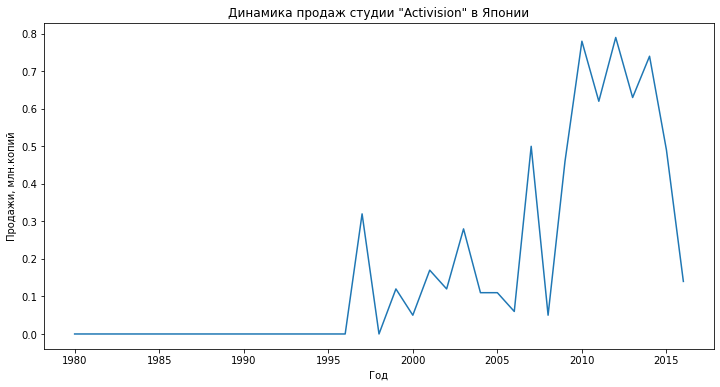

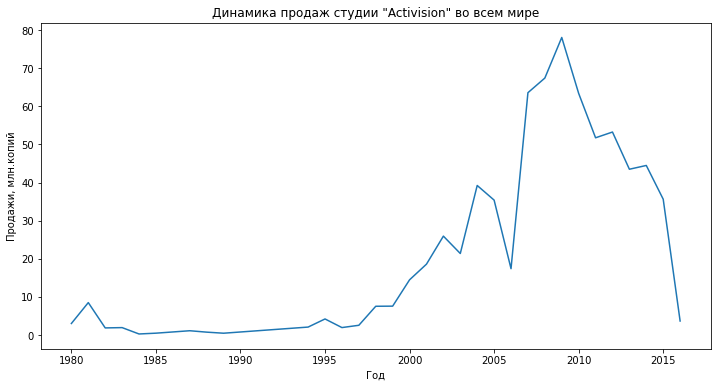

In [100]:
# Мы хотим построить линейные графики для продаж студии "Activision" в Северной Америке, 
# Европе, Японии и всем мире - по ним и будем итерировать:

data = df[df['Publisher'] == 'Activision'].sort_values('Year', ascending=False)

for sales in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']:
    x = data.groupby('Year').agg('sum').index
    y = data.groupby('Year').agg('sum')[sales]
    
    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(x, y)
    
    my_title = ''
    if sales == 'NA_Sales':
        my_title = 'Динамика продаж студии "Activision" в Северной Америке'
    if sales == 'EU_Sales':
        my_title = 'Динамика продаж студии "Activision" в Европе'
    if sales == 'JP_Sales':
        my_title = 'Динамика продаж студии "Activision" в Японии'
    if sales == 'Global_Sales':
        my_title = 'Динамика продаж студии "Activision" во всем мире'
    
    ax.set_title(my_title)
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи, млн.копий')
    
plt.show()

# 3-й вариант - после группировки и агрегирования можно добавить .index

<a id='14'></a>

### 14 - Линейные графики на одном полотне

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

In [101]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


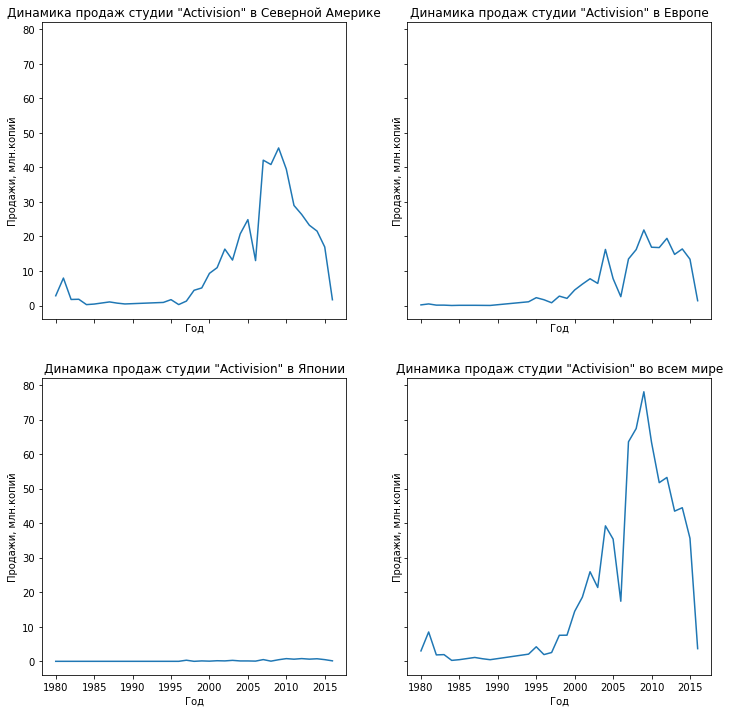

In [102]:
fig, axs = plt.subplots(figsize=(12, 12), ncols=2, nrows=2, sharex=True, sharey=True)

data = df[df['Publisher'] == 'Activision'].sort_values('Year', ascending=False)

sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

for i in range(len(sales)):
    data = df[df['Publisher'] == 'Activision'] .sort_values('Year', ascending=False)
    
    my_title = ''
    if sales[i] == 'NA_Sales':
        my_title = 'Динамика продаж студии "Activision" в Северной Америке'
        ax = axs[0][0]
        x = data.groupby('Year').agg('sum').index
        y = data.groupby('Year').agg('sum')[sales[i]]
        ax.plot(x, y)

    if sales[i] == 'EU_Sales':
        my_title = 'Динамика продаж студии "Activision" в Европе'
        ax = axs[0][1]
        x = data.groupby('Year').agg('sum').index
        y = data.groupby('Year').agg('sum')[sales[i]]
        ax.plot(x, y)

    if sales[i] == 'JP_Sales':
        my_title = 'Динамика продаж студии "Activision" в Японии'
        ax = axs[1][0]
        x = data.groupby('Year').agg('sum').index
        y = data.groupby('Year').agg('sum')[sales[i]]
        ax.plot(x, y)

    if sales[i] == 'Global_Sales':
        my_title = 'Динамика продаж студии "Activision" во всем мире'
        ax = axs[1][1]
        x = data.groupby('Year').agg('sum').index
        y = data.groupby('Year').agg('sum')[sales[i]]
        ax.plot(x, y)

    ax.set_title(my_title)
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи, млн.копий')
    
plt.show()

<a id='15'></a>

### 15 - Гистограммы в одних координатных осях

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

In [103]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


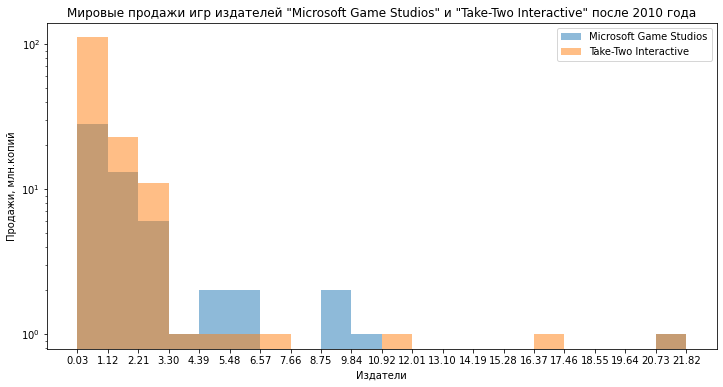

In [104]:
df1 = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)]['Global_Sales']
df2 = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)]['Global_Sales']
          
fig, ax = plt.subplots(figsize=(12,6))
          
_, bins, _ = ax.hist(df1, label='Microsoft Game Studios', alpha=0.5, bins=20, log=True)
ax.hist(df2, label='Take-Two Interactive', alpha=0.5, bins=bins)
          
ax.set_title('Мировые продажи игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года')
ax.set_xlabel('Издатели')
ax.set_ylabel('Продажи, млн.копий')
ax.set_xticks(list(bins))
ax.legend()

plt.show()

<a id='16'></a>

### 16 - Столбчатая диаграмма с раскрашенными столбцами

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

In [105]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [106]:
df1 = df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False).head(5)
df1

Platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
NES      98.65
Name: JP_Sales, dtype: float64

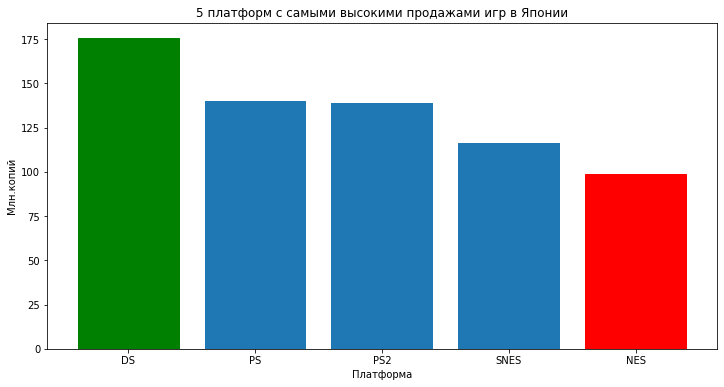

In [107]:
fig, ax = plt.subplots(figsize=(12,6))

patches = ax.bar(df1.index, df1)

max_index = 0
patches[max_index].set_color('green')
min_index = len(df1) - 1
patches[min_index].set_color('red')

ax.set_title('5 платформ с самыми высокими продажами игр в Японии')
ax.set_xlabel('Платформа')
ax.set_ylabel('Млн.копий')

plt.show()

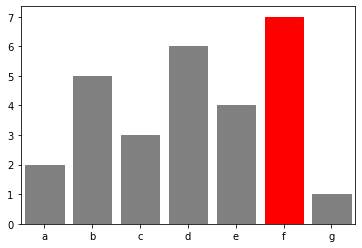

In [108]:
# Как раскрасить столбец в seaborn:

import seaborn as sns
import numpy as np

values = np.array([2, 5, 3, 6, 4, 7, 1])
idx = np.array(list('abcdefg'))

ax = sns.barplot(x=idx, y=values)

for bar in ax.patches:
    if bar.get_height() > 6:
        bar.set_color('red')
    else:
        bar.set_color('grey')

<a id='17'></a>

### 17 - Линейный график с подсвеченным промежутком времени (зеленый прямоугольник)

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

In [109]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [110]:
df1 = df[df['Publisher'] == 'Nintendo'].fillna(0).sort_values(by='Year')  # избавляемся от нанов
out = df1['Year'].isin(range(1, 2021))  # избавляемся от нулей
df1 = df1[out]
a = round(df1['Year'].max())
b = round(df1['Year'].min())
data = []  # кол-во игр
data2 = [] # годы
for i in range(b, a):
    data.append(df1[df1['Year'] == i].shape[0]) # кол-во строк
    data2.append(i)
df2 = pd.DataFrame({'Year': data2, 'Games': data})
df2.head()

,Year,Games
0,1983,6
1,1984,9
2,1985,7
3,1986,6
4,1987,4


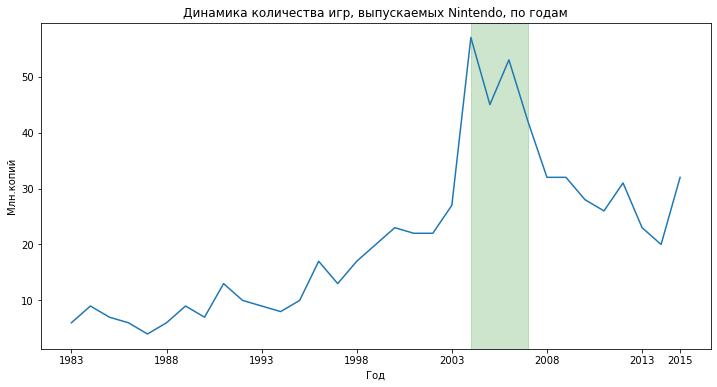

In [111]:
fig, ax = plt.subplots(figsize=(12,6))

ind = df2.index[df2['Games'] >= 35]

# ind[0], а не 0, чтобы начинать с первого элемента, а не с нуля:

first = ind[0]
second = ind[0]

for i in range(1, len(ind)):
    if ind[i] - ind[i - 1] != 1:
        second = ind[i - 1]
        ax.axvspan(xmin=df2['Year'][first], xmax=df2['Year'][second], color='green', alpha=0.2)
        first = ind[i]
second = ind[len(ind) - 1]

# Чтобы увидеть последний промежуток:

ax.axvspan(xmin=df2['Year'][first], xmax=df2['Year'][second], color='green', alpha=0.2)
ax.plot(df2['Year'], df2['Games']) 

plt.title('Динамика количества игр, выпускаемых Nintendo, по годам')
plt.xlabel('Год')
plt.ylabel('Млн.копий')
ax.set_xticks(list(range(int(df2['Year'].min()), int(df2['Year'].max()), 5)) + [int(df2['Year'].max())])

plt.show()

<a id='18'></a>

### 18 - Точечные графики на одном полотне

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

In [112]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [113]:
df1 = df.groupby('Genre').agg('sum').sort_values('Global_Sales', ascending=False).head(3)
df1

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Sports,17419112,4620621.0,683.35,376.85,135.37,134.97,1330.93
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37


In [114]:
df2 = df.groupby('Publisher').agg('sum').sort_values('Global_Sales', ascending=False).head(4)
df2

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,2714164,1394666.0,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,7140412,2686562.0,595.07,371.27,14.04,129.77,1110.32
Activision,6368325,1938979.0,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,4105604,1367034.0,265.22,187.72,74.10,80.45,607.50


In [115]:
data = []
for i in range(4):
    tmp = []
    for j in range(3):
        tmp.append(df[(df['Publisher'] == df2.index[i]) & (df['Genre'] == df1.index[j])].groupby('Year').agg('sum')[['NA_Sales', 'Global_Sales']])
    data.append(tmp)
print(data[0])

[        NA_Sales  Global_Sales
Year                          
1984.0      0.80          1.85
1985.0      1.64          3.50
1986.0      5.07          9.81
1991.0      2.42          4.61
1992.0      2.21          3.83
1994.0      0.57          1.42
1996.0      2.00          2.65
1997.0      0.39          0.71
1998.0      4.10          7.60
1999.0      0.62          1.78
2000.0      3.45          5.88
2001.0      3.30          5.52
2002.0      6.23          9.93
2004.0      1.62          2.62
2005.0      0.37          0.65
2006.0      4.98          9.00
2007.0      1.99          5.41
2008.0      0.00          0.08
2009.0      5.93         15.73
2010.0      1.25          2.00
2011.0      5.22         10.74
2012.0      1.17          3.19
2013.0      4.31          9.83
2014.0      1.15          2.68
2015.0      1.70          4.03
2016.0      1.00          3.05,         NA_Sales  Global_Sales
Year                          
1983.0      0.73          3.20
1984.0      1.70          6.18
1985.0

Float64Index([1984.0, 1985.0, 1986.0, 1991.0, 1992.0, 1994.0, 1996.0, 1997.0,
              1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2004.0, 2005.0, 2006.0,
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', name='Year') Year
1984.0    0.80
1985.0    1.64
1986.0    5.07
1991.0    2.42
1992.0    2.21
1994.0    0.57
1996.0    2.00
1997.0    0.39
1998.0    4.10
1999.0    0.62
2000.0    3.45
2001.0    3.30
2002.0    6.23
2004.0    1.62
2005.0    0.37
2006.0    4.98
2007.0    1.99
2008.0    0.00
2009.0    5.93
2010.0    1.25
2011.0    5.22
2012.0    1.17
2013.0    4.31
2014.0    1.15
2015.0    1.70
2016.0    1.00
Name: NA_Sales, dtype: float64


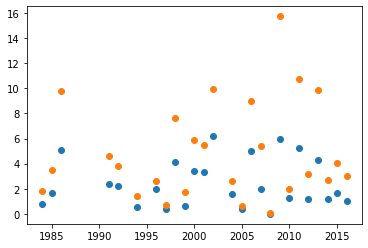

In [116]:
fig, ax = plt.subplots(figsize=(6, 4))
print(data[0][0].index, data[0][0]['NA_Sales'])
ax.scatter(data[0][0].index, data[0][0]['NA_Sales'], label='NA_Sales')
ax.scatter(data[0][0].index, data[0][0]['Global_Sales'], label='Global_Sales')

plt.show()

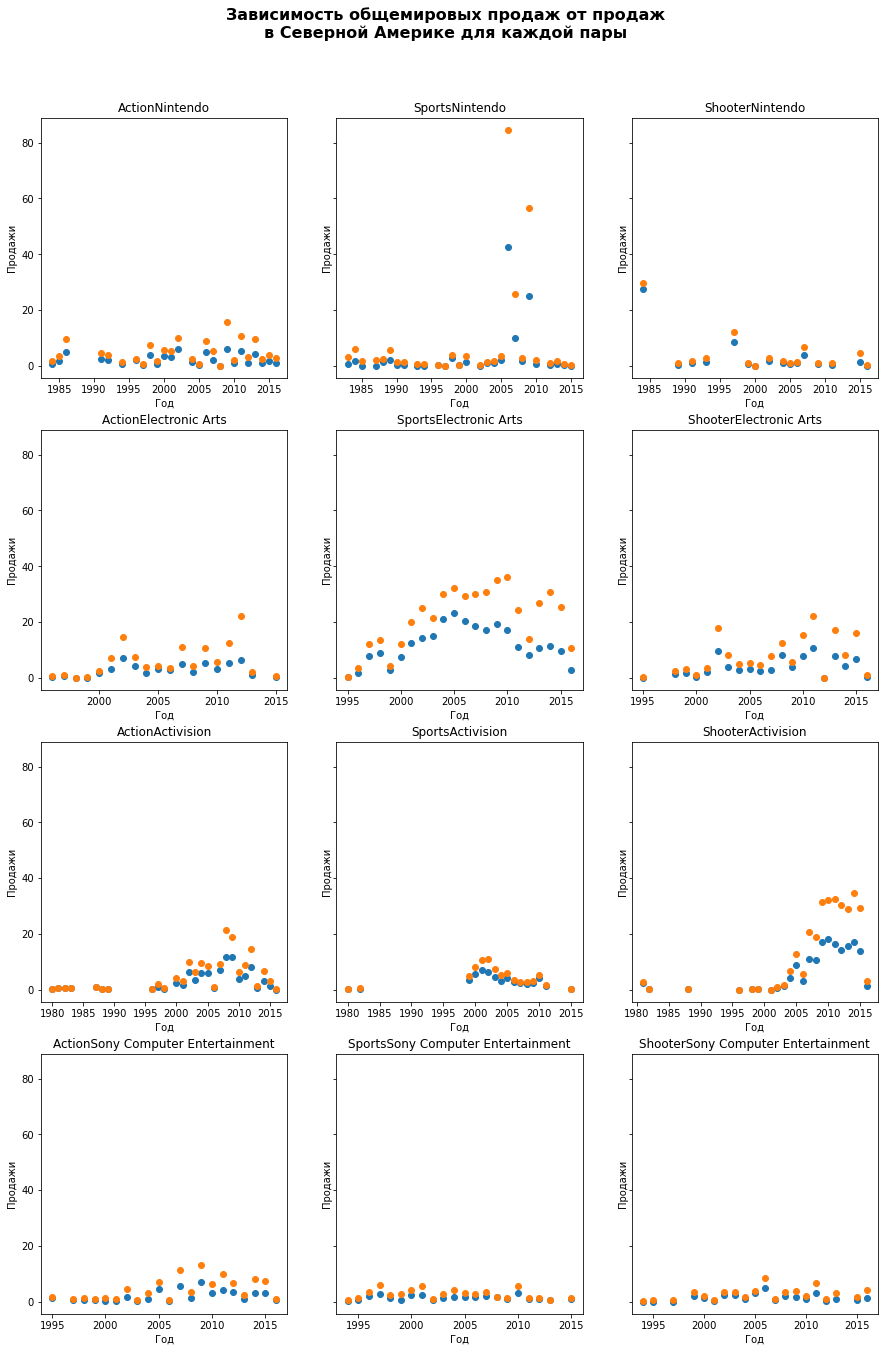

In [117]:
fig, axs = plt.subplots(figsize=(15, 22), nrows=4, ncols=3, sharey=True)

for i in range(4):
    for j in range(3):
        ax = axs[i][j]

        ax.scatter(data[i][j].index, data[i][j]['NA_Sales'], label='NA_Sales')
        ax.scatter(data[i][j].index, data[i][j]['Global_Sales'], label='Global_Sales')
        
        ax.set_title(df1.index[j] + df2.index[i])
        ax.set_xlabel('Год')
        ax.set_ylabel('Продажи')

fig.suptitle('Зависимость общемировых продаж от продаж\nв Северной Америке для каждой пары', 
             fontweight='bold', y = 0.95, fontsize=16)
plt.show()